In [15]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("triage.csv.gz")

## EDA

##### Checking shape

In [3]:
df.shape

(425087, 11)

##### How Data look

In [4]:
df.sample(4)

,subject_id,stay_id,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,chiefcomplaint
79879,11899466,34059624,98.2,70.0,16.0,96.0,122.0,90.0,5,3.0,VAGINAL BLEEDING
249134,15866216,30854889,98.6,83.0,18.0,99.0,104.0,66.0,6,3.0,ABD PAIN
45057,11076033,38137950,98.5,60.0,16.0,96.0,120.0,47.0,0,2.0,ABNORMAL LAB VALUES
324055,17630174,31157029,98.4,73.0,18.0,100.0,149.0,65.0,0,2.0,Chest pain


##### Datatype of attribute

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425087 entries, 0 to 425086
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   subject_id      425087 non-null  int64  
 1   stay_id         425087 non-null  int64  
 2   temperature     401672 non-null  float64
 3   heartrate       407997 non-null  float64
 4   resprate        404734 non-null  float64
 5   o2sat           404491 non-null  float64
 6   sbp             406796 non-null  float64
 7   dbp             405996 non-null  float64
 8   pain            412154 non-null  object 
 9   acuity          418100 non-null  float64
 10  chiefcomplaint  425064 non-null  object 
dtypes: float64(7), int64(2), object(2)
memory usage: 35.7+ MB


##### Checking missing value

In [6]:
df.isnull().sum()

subject_id            0
stay_id               0
temperature       23415
heartrate         17090
resprate          20353
o2sat             20596
sbp               18291
dbp               19091
pain              12933
acuity             6987
chiefcomplaint       23
dtype: int64

##### Checking duplicate

In [7]:
df.duplicated().sum()

0

##### Description of data

In [8]:
df.describe()

,subject_id,stay_id,temperature,heartrate,resprate,o2sat,sbp,dbp,acuity
count,4.250870e+05,4.250870e+05,401672.000000,407997.000000,404734.000000,404491.000000,406796.000000,405996.000000,418100.000000
mean,1.500871e+07,3.499735e+07,98.015046,85.079891,17.565521,98.471888,135.395352,81.262126,2.625102
std,2.878486e+06,2.888342e+06,4.008575,18.041690,5.485706,17.040807,240.956408,1057.220031,0.708084
min,1.000003e+07,3.000001e+07,0.100000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,1.251789e+07,3.249799e+07,97.500000,72.000000,16.000000,97.000000,120.000000,68.000000,2.000000
50%,1.501628e+07,3.499395e+07,98.000000,84.000000,18.000000,99.000000,133.000000,77.000000,3.000000
75%,1.749900e+07,3.750387e+07,98.600000,96.000000,18.000000,100.000000,148.000000,87.000000,3.000000
max,1.999999e+07,3.999996e+07,986.000000,1228.000000,1820.000000,9322.000000,151103.000000,661672.000000,5.000000


#### Target class acuity

Text(0, 0.5, 'Frequency')

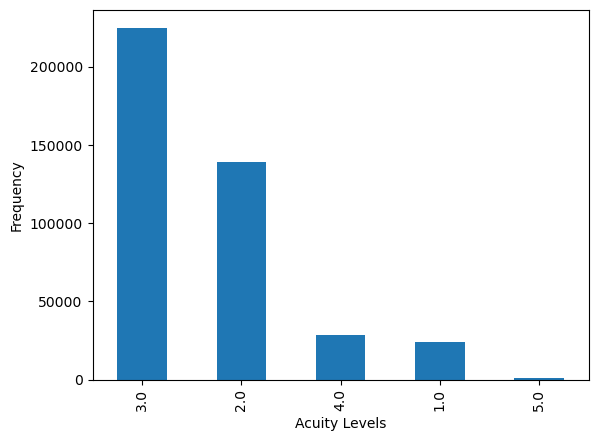

In [9]:
df['acuity'].value_counts().plot(kind='bar')
plt.xlabel('Acuity Levels') 
plt.ylabel('Frequency')  

### Handling the pain attribute

In [10]:
df['pain'] = df['pain'].str.strip()
pain_counts = df[['pain']].value_counts()
pain_counts

pain    
0           140766
8            41744
10           41005
7            31425
5            29219
             ...  
CRITICAL         1
Critcal          1
Declined         1
FACES 4          1
yes.             1
Length: 782, dtype: int64

In [11]:
pain_counts = df.groupby(['pain']).size().reset_index(name='counts')
print(pain_counts)

               pain  counts
0        " alittle"       1
1              "10"       1
2             "10+"       2
3            "10++"       1
4             "100"       1
..              ...     ...
777         yelling       1
778             yes     110
779     yes - R arm       1
780  yes everywhere       1
781            yes.       1

[782 rows x 2 columns]


In [12]:
# Identify and handle non-numeric values
non_numeric_values = pd.to_numeric(df['pain'], errors='coerce').isna()
df.loc[non_numeric_values, 'pain'] = None  # Replace non-numeric values with NaN
# Convert the 'pain' column to numeric
df['pain'] = pd.to_numeric(df['pain'], errors='coerce')
df[['pain']]

,pain
0,7.0
1,0.0
2,10.0
3,10.0
4,13.0
...,...
425082,5.0
425083,8.0
425084,4.0
425085,0.0


#### Checking the null value

In [13]:
df.isnull().sum()

subject_id            0
stay_id               0
temperature       23415
heartrate         17090
resprate          20353
o2sat             20596
sbp               18291
dbp               19091
pain              28114
acuity             6987
chiefcomplaint       23
dtype: int64

### Correlation

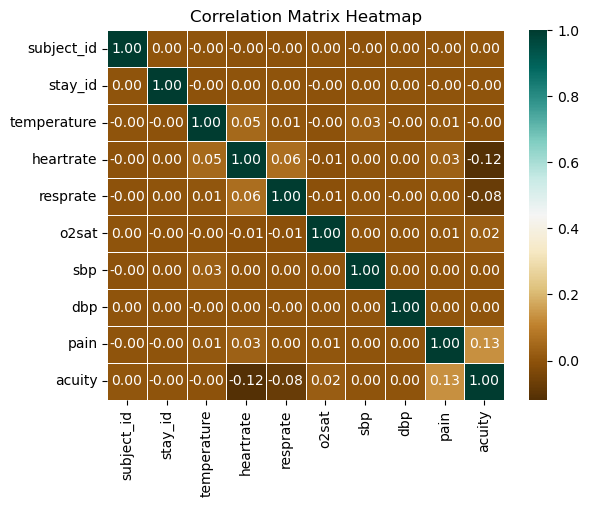

subject_id     0.003699
stay_id       -0.000309
temperature   -0.002707
heartrate     -0.118672
resprate      -0.078367
o2sat          0.024070
sbp            0.002125
dbp            0.001051
pain           0.131456
acuity         1.000000
Name: acuity, dtype: float64


In [16]:
# plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='BrBG', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()
print(df.corr()['acuity'])

#### Before Normalization

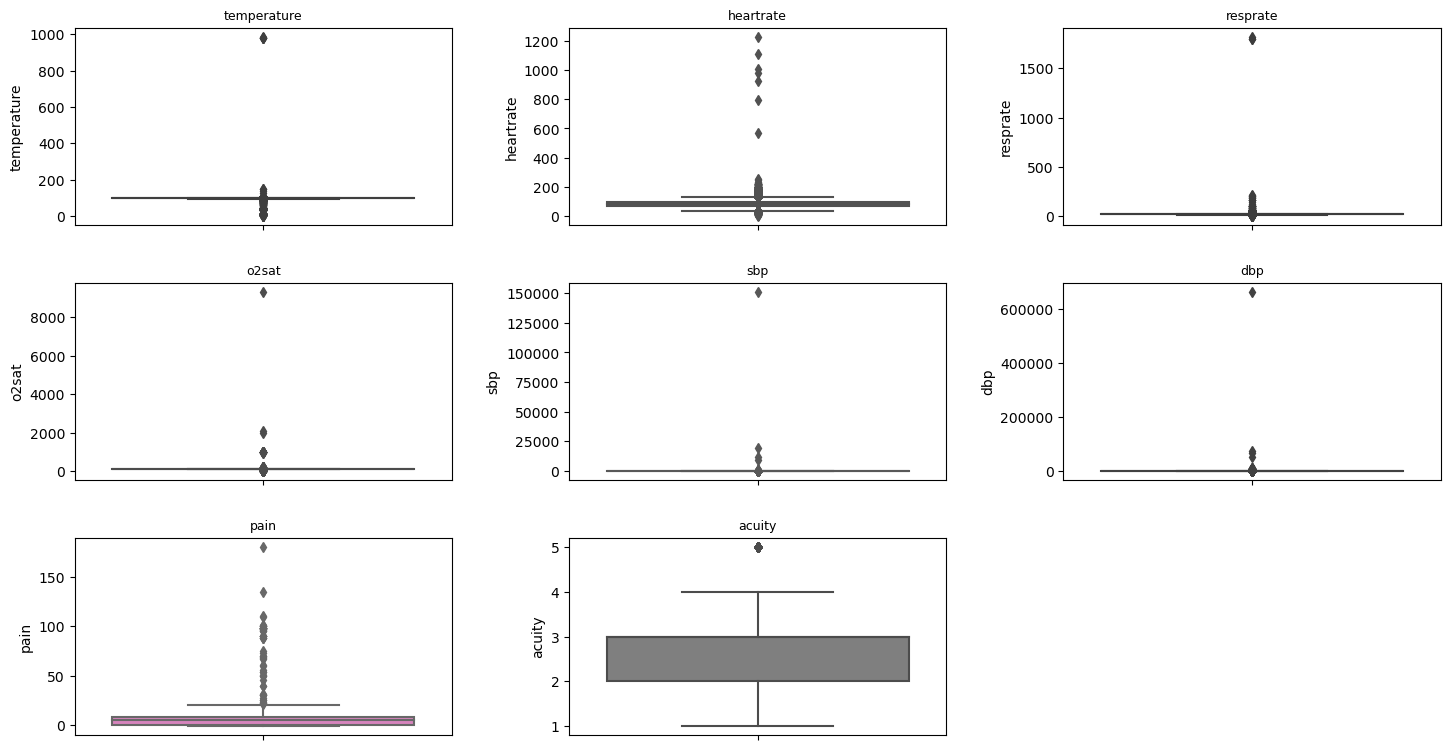

In [17]:
columnas = [ 'temperature', 'heartrate', 'resprate',
            'o2sat', 'sbp', 'dbp','pain','acuity']

f, axes = plt.subplots(3, 3, figsize=(15, 8))
axes = axes.flatten()

def create_boxplot_styled(column, ax, color):
    sns.boxplot(y=column, data=df, ax=ax, color=color)
    ax.set_title(column, fontsize=9)
    ax.set_xlabel("")

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b",
          "#e377c2", "#7f7f7f", "#bcbd22", "#17becf", "#aec7e8"]

for i, col in enumerate(columnas):
    create_boxplot_styled(col, axes[i], colors[i])

for i in range(len(columnas), len(axes)):
    f.delaxes(axes[i])

plt.tight_layout(pad=2.5)

plt.show()

#### After Normalization

In [18]:

# Assuming 'df' is your DataFrame
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a DataFrame of outliers
outliers_df = ((df < lower_bound) | (df > upper_bound))

# Print the count of outliers for each column
outlier_counts = outliers_df.sum()
print(outlier_counts)

# Filter the DataFrame to exclude outliers
df = df[~outliers_df.any(axis=1)]

# Reset the index of the filtered DataFrame
df.reset_index(drop=True, inplace=True)


acuity             1100
chiefcomplaint        0
dbp                5903
heartrate          4601
o2sat              5178
pain                 60
resprate          21249
sbp                7765
stay_id               0
subject_id            0
temperature       12333
dtype: int64


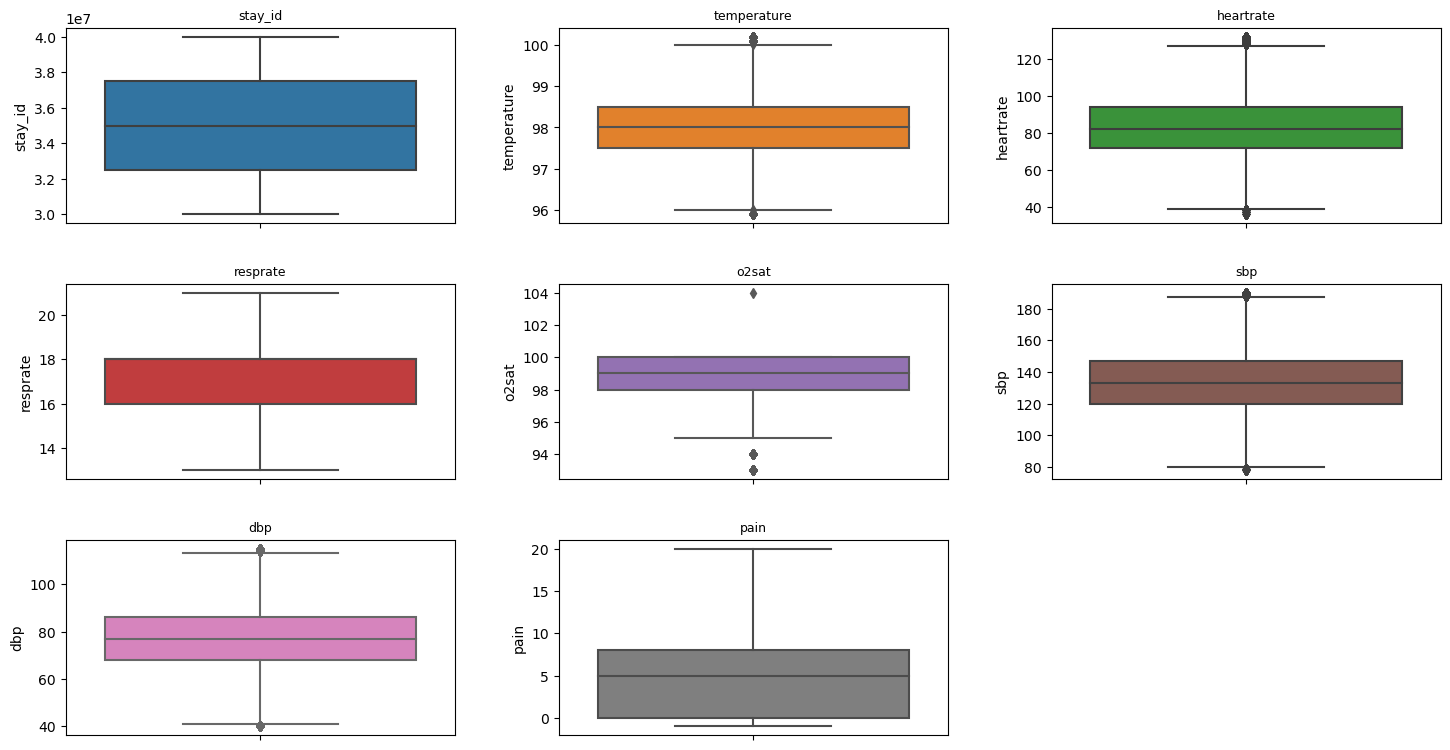

In [19]:
columnas = ['stay_id', 'temperature', 'heartrate', 'resprate',
            'o2sat', 'sbp', 'dbp','pain']

f, axes = plt.subplots(3, 3, figsize=(15, 8))
axes = axes.flatten()

def create_boxplot_styled(column, ax, color):
    sns.boxplot(y=column, data=df, ax=ax, color=color)
    ax.set_title(column, fontsize=9)
    ax.set_xlabel("")

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b",
          "#e377c2", "#7f7f7f", "#bcbd22", "#17becf", "#aec7e8"]

for i, col in enumerate(columnas):
    create_boxplot_styled(col, axes[i], colors[i])

for i in range(len(columnas), len(axes)):
    f.delaxes(axes[i])

plt.tight_layout(pad=2.5)

plt.show()


In [20]:
df

,subject_id,stay_id,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,chiefcomplaint
0,10000032,33258284,98.4,70.0,16.0,97.0,106.0,63.0,0.0,3.0,"Abd pain, Abdominal distention"
1,10000032,35968195,99.4,105.0,18.0,96.0,106.0,57.0,10.0,3.0,"n/v/d, Abd pain"
2,10000032,38112554,98.9,88.0,18.0,97.0,116.0,88.0,10.0,3.0,Abdominal distention
3,10000032,39399961,98.7,77.0,16.0,98.0,96.0,50.0,13.0,2.0,"Abdominal distention, Abd pain, LETHAGIC"
4,10000084,35203156,97.5,78.0,16.0,100.0,114.0,71.0,0.0,2.0,"Confusion, Hallucinations"
...,...,...,...,...,...,...,...,...,...,...,...
374654,19999784,35692999,98.6,80.0,18.0,100.0,161.0,100.0,0.0,3.0,L Leg weakness
374655,19999784,37972930,98.0,91.0,16.0,99.0,148.0,90.0,5.0,2.0,Abnormal MRI
374656,19999828,30712109,98.1,83.0,18.0,100.0,107.0,75.0,8.0,2.0,"Abd pain, Wound eval"
374657,19999828,32917002,96.6,112.0,18.0,100.0,110.0,82.0,4.0,2.0,"Abd pain, Wound eval"


#### Droping columns of less importance

In [29]:
col_to_drop=['subject_id', 'stay_id','chiefcomplaint']
df=df.drop(columns=col_to_drop)


#### Duplicate columns after droping subject ids, stayids

In [30]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

16040


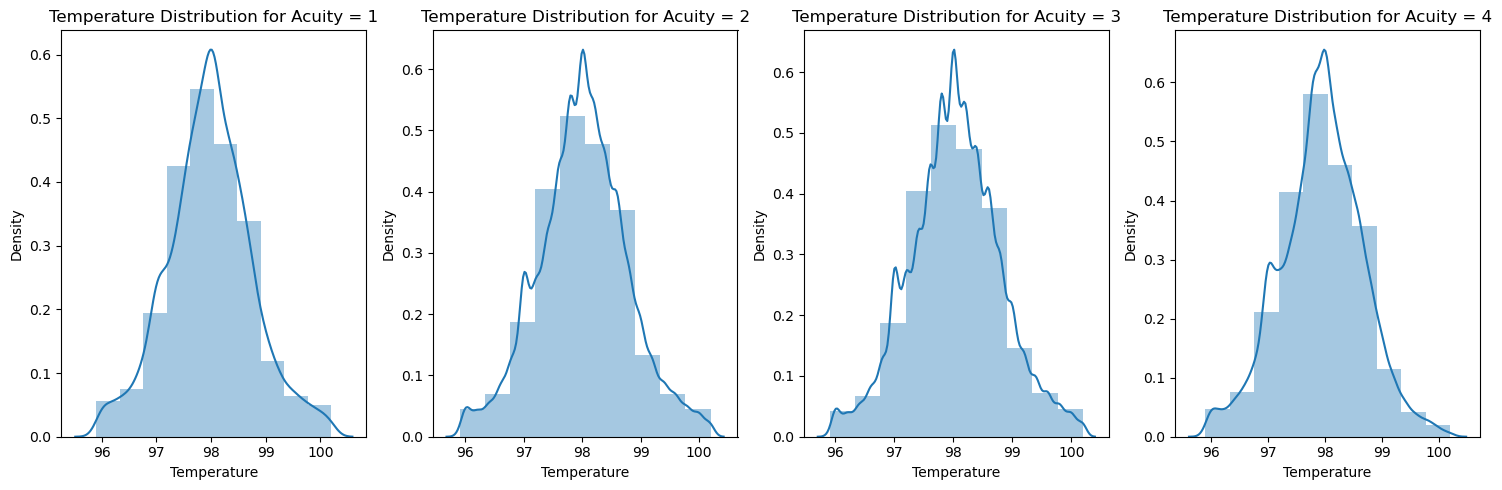

In [48]:

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Plot for each acuity level
for i, ax in zip(range(1, 5), axes.flatten()):
    sns.distplot(df[df['acuity'] == i]['temperature'], bins=10, ax=ax)
    ax.set_xlabel('Temperature')
    ax.set_ylabel('Density')
    ax.set_title(f'Temperature Distribution for Acuity = {i}')

plt.tight_layout()
plt.show()



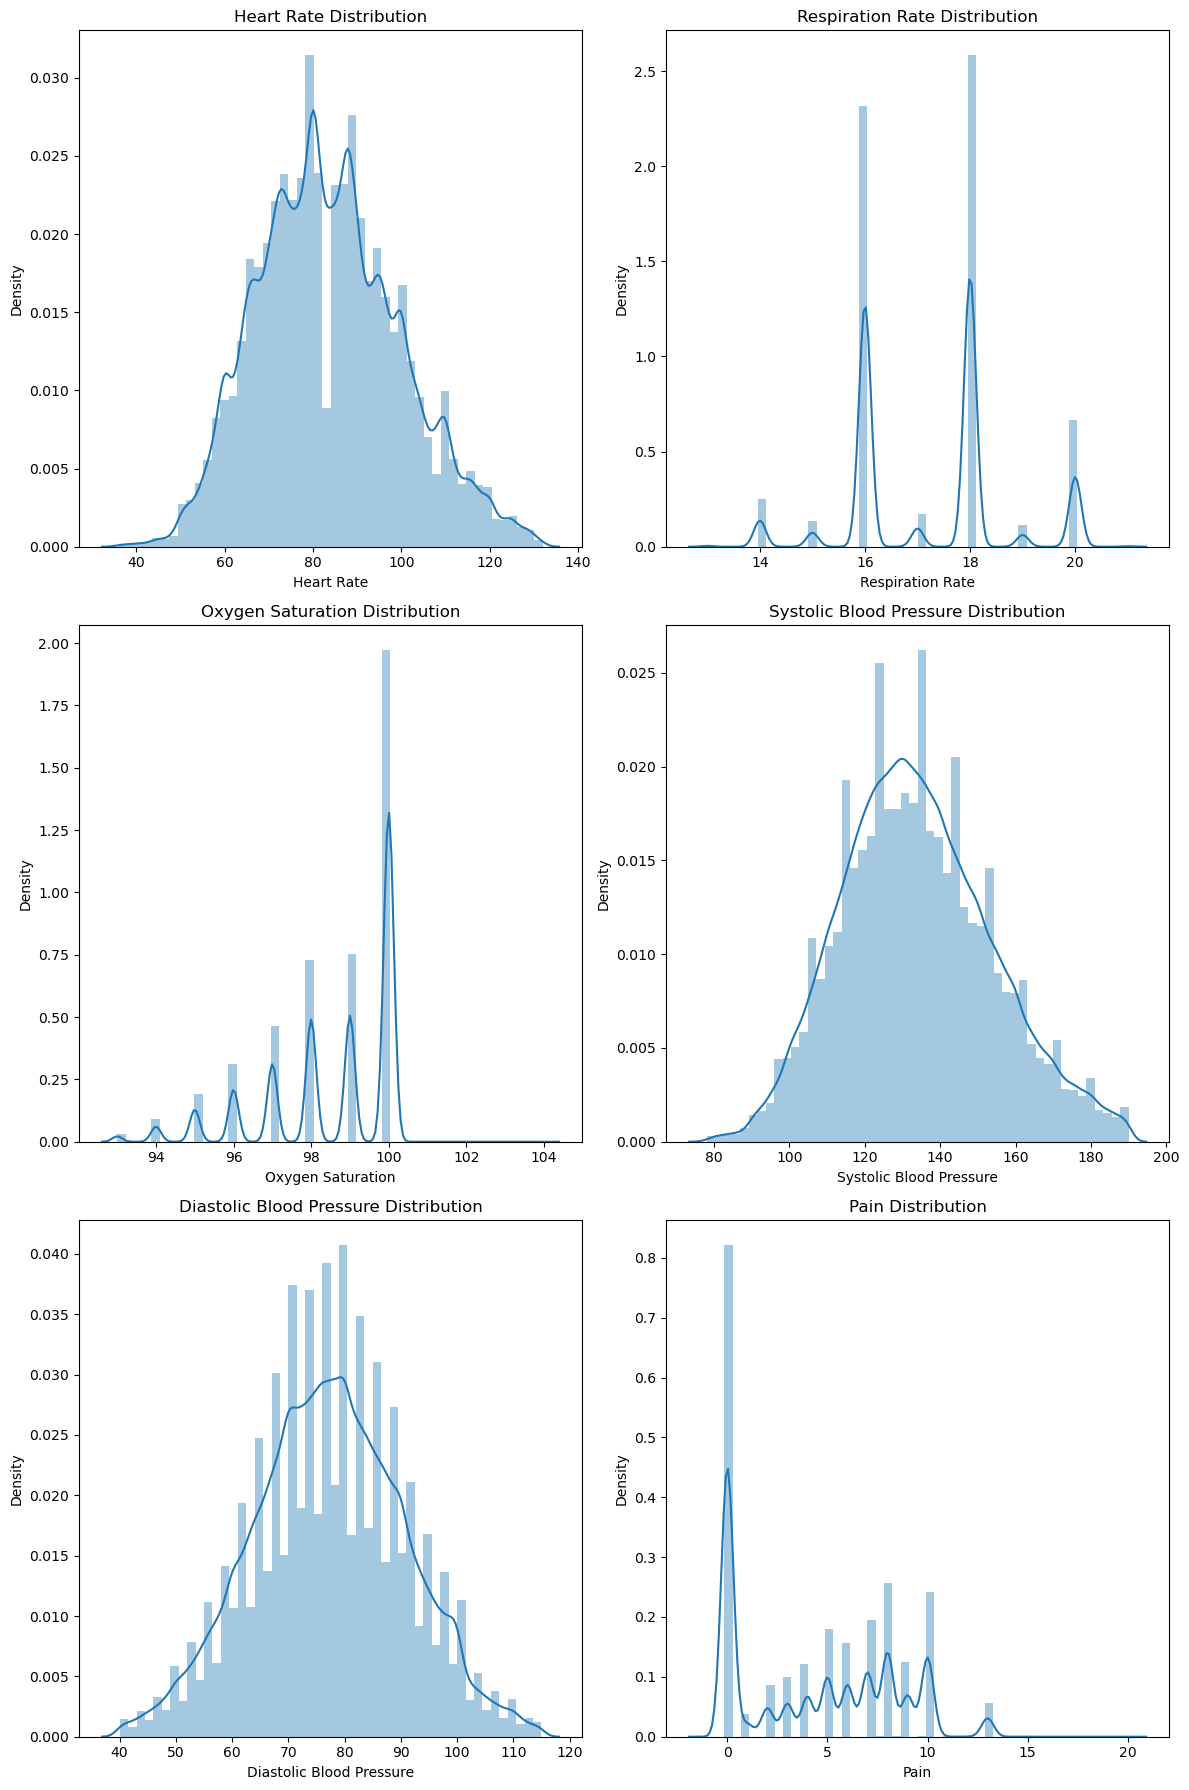

In [54]:

fig, axes = plt.subplots(3, 2, figsize=(12, 18))

# Plot each distribution
sns.distplot(df['heartrate'], ax=axes[0, 0])
axes[0, 0].set_title('Heart Rate Distribution')
axes[0, 0].set_xlabel('Heart Rate')

sns.distplot(df['resprate'], ax=axes[0, 1])
axes[0, 1].set_title('Respiration Rate Distribution')
axes[0, 1].set_xlabel('Respiration Rate')

sns.distplot(df['o2sat'], ax=axes[1, 0])
axes[1, 0].set_title('Oxygen Saturation Distribution')
axes[1, 0].set_xlabel('Oxygen Saturation')

sns.distplot(df['sbp'], ax=axes[1, 1])
axes[1, 1].set_title('Systolic Blood Pressure Distribution')
axes[1, 1].set_xlabel('Systolic Blood Pressure')

sns.distplot(df['dbp'], ax=axes[2, 0])
axes[2, 0].set_title('Diastolic Blood Pressure Distribution')
axes[2, 0].set_xlabel('Diastolic Blood Pressure')

sns.distplot(df['pain'], ax=axes[2, 1])
axes[2, 1].set_title('Pain Distribution')
axes[2, 1].set_xlabel('Pain')

plt.tight_layout()
plt.show()
